# Predicting Stock Prices with Montecarlo Simulation

## 0) Import all the necessary libraries

In [74]:
import numpy as np  
import pandas as pd  
import pandas_datareader.data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

## 1) Obtain the Sample Data

#### 1.1)  Download the daily Adjustedd Closing Prices of a company of choice from Yahoo.

Here we define:

- [ticker]: The company's ticker
- [t_0]: which represents the starting date of our data sample
- [t_1]: which represents the ending date of our data sample

In [75]:
ticker = 'AAPL' 
t_0='2007-1-1'
t_1='2018-1-1'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start=t0, end=t1,)['Adj Close']

The stock prices are now stored in a DataFrame called, namely [data]. 

Let us plot these prices on a line chart to visualise our sample data.

Text(0, 0.5, 'Price in $')

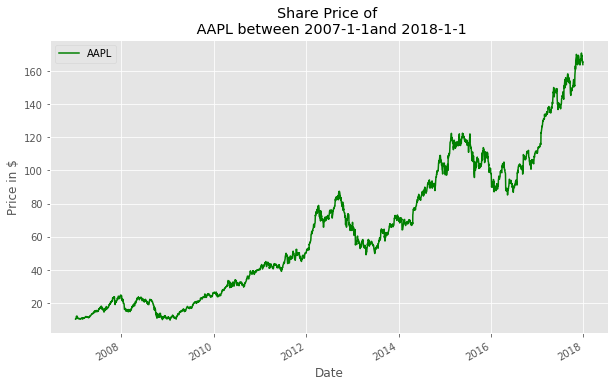

In [112]:
data.plot(figsize=(10, 6), color = 'green');
plt.title('Share Price of \n {} '.format(ticker) + 'between {}'.format(t_0) + 'and {}'.format(t_1))
plt.ylabel('Price in $')

#### 1.2)  Compute the daily returns

In [77]:
log_returns = np.log(1 + data.pct_change())

We have now a second dataframe called [log_returns] where all of the daily returns are stored.

We can plot these returns and highlight in blue the mean daily return. 

NB: The upward trend of oberved in the first graph is reflected by a mean return above zero.

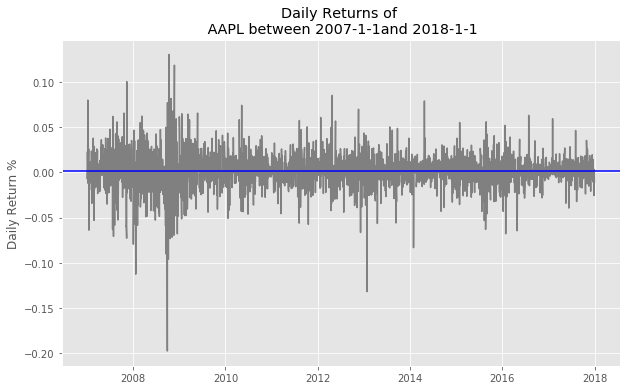

In [110]:
plt.figure(figsize=(10,6))
plt.title('Daily Returns of \n {} '.format(ticker) + 'between {}'.format(t_0) + 'and {}'.format(t_1))
plt.ylabel('Daily Return %')
plt.plot(log_returns, color='gray')
plt.axhline(float(log_returns.mean()), color = 'blue')

## 2) Predicting furure returns with Geometric Browinan Motion.

$$
r = drift + stdev \cdot z
$$


In this model we assume:

- The future retuns follow the trajectory emerging from the past observations. This is captured by the [drift] component.
- But this trend will be subject to normally distributed shocks that are caputred by the stochastic component of the euation 






#### 2.1) The Drift component:

$$
drift = u - \frac{1}{2} \cdot var
$$



In [113]:
u = log_returns.mean()

In [114]:
var = log_returns.var()

In [121]:
drift = u - (0.5 * var)
drift[0]

0.0007945061252841723

In [116]:
stdev = log_returns.std()

#### 2.2.0) Creating a Matrix of Random Z-Scores

In [39]:
norm.ppf(0.95)

1.6448536269514722

The acronym ppf stands for percent point function, which is another name for the quantile function. By default, norm. ppf uses mean=0 and stddev=1, which is the "standard" normal distribution.

In this example we obtained the Z-score for a normal distribution with 95% confidence level.

In [40]:
X = np.random.rand(10, 2)
X

array([[0.22708855, 0.55385856],
       [0.48005663, 0.59783331],
       [0.13004349, 0.27312148],
       [0.94375424, 0.9137119 ],
       [0.65622767, 0.43584647],
       [0.80121061, 0.01404762],
       [0.27648071, 0.65437385],
       [0.74094834, 0.17676223],
       [0.4543768 , 0.69362089],
       [0.95850495, 0.84160747]])

Now we have created a 10x2 matrix [X] of randomly generated values.
Where 0 ≤ x(i,j) ≤ 

In [41]:
norm.ppf(X)

array([[-0.74846936,  0.13541611],
       [-0.05001146,  0.24774283],
       [-1.12618556, -0.6033995 ],
       [ 1.58709325,  1.36397256],
       [ 0.40218937, -0.16150848],
       [ 0.84595334, -2.19595405],
       [-0.59332837,  0.39715618],
       [ 0.64627184, -0.92777469],
       [-0.11461083,  0.50614021],
       [ 1.73359425,  1.00108634]])

Calling the norm.ppf function on the 'X' Matrix will give us the critical values for all the 20 randomly generated confidence levels.

Putting all of these steps toghether, we can quickly obtain [Z]

In [42]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 1.60599713,  0.1921351 ],
       [ 0.47981014, -0.01494517],
       [-0.22044444, -0.09918576],
       [ 1.28505592,  1.45813458],
       [-0.53905902, -0.89065417],
       [-0.74704464,  0.12641258],
       [ 0.08773971, -1.17593184],
       [ 1.0678527 ,  0.07395272],
       [ 0.06187645,  0.57634938],
       [-0.14823761, -0.43934713]])

#### 2.2) Projecting the daily returns:

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

Now we have all the elements we need to compute the predicted returns. 


We need to imput:

- [trials]: how many times we want the process to be repeated
- [projected_days]: how many days in the future are we going to project our data

These values will be the dimensions of our Z matrix and consequenlty of our projected rerurns matrix [daily_returns]. We can later verify that by running code ``` daily_returns.shape ```

In [129]:
projected_days = 251
trials = 50

_In this example we will compute 50 possible stock price paths and we will observe how these will evolve over a period of 251 trading days (or one year)_

In [141]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, trials)))
daily_returns

array([[0.99086395, 1.02467954, 1.02525148, ..., 1.01771624, 0.97413707,
        0.98651708],
       [1.01027153, 0.94211287, 0.96270561, ..., 1.01019095, 0.99894621,
        1.01574434],
       [0.98934583, 0.98720148, 0.99962899, ..., 1.01895787, 1.01733802,
        1.04425747],
       ...,
       [0.99424866, 1.0127334 , 1.02253505, ..., 0.95959976, 1.01992959,
        0.99566569],
       [1.01663554, 0.99360741, 0.99239038, ..., 0.97834371, 1.03550132,
        1.03709768],
       [1.00256649, 1.01793889, 0.99374503, ..., 1.03280187, 1.0260871 ,
        0.98356753]])

_NB: both 'drift' and 'stdev' are not vectors of values but pandas series. Therefore, when computing the [daily_returns] we have to convert these objects into vectors of values by applying the function .values to them_

## 3) Predicting Stock Prices

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

The stock price at time t is equal to the spot price times the daily return.

The same logic can be applied to the future periods

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{T} = S_{T-1} \mathbin{\cdot} daily\_return_{T-1}
$$

Where T is the last projected day

Now we can create an empty matrix where we will store all the predicted stock values, namely [projected_prices]
- We have to impose the dimensions of this matrix to be euqal to the [daily_returns]'s one and we will do so by using the command:

In [142]:
projected_price = np.zeros_like(daily_returns)

- We will set the first row of this matrix equal to the spot price S0 so that all the possible stock ptices paths will be computed starting from the last observed price

Let us set the spot price queal to the last obser vation of out dataset with the function 

In [143]:
S0 = data.iloc[-1]
S0

AAPL    163.869995
Name: 2017-12-29 00:00:00, dtype: float64

In [144]:
projected_price[0] = S0
projected_price

array([[163.86999512, 163.86999512, 163.86999512, ..., 163.86999512,
        163.86999512, 163.86999512],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

_In this case the last observed price on the 2017-12-29 is $ 163.87_

Now we can proceed to fill all the empty values of the [price_list] matrix by applying the previously computed future returns. 

We will do so by suing a 'for loop' that applies the following fromula:

$$
S_t = S_{t-1} \mathbin{\cdot} daily\_return_t
$$
<br />

In [145]:
for t in range(1, projected_days):
    projected_price[t] = projected_price[t - 1] * daily_returns[t]

## 3) Plotting results

Here we are plotting all the computed possible evolution of the stock price.

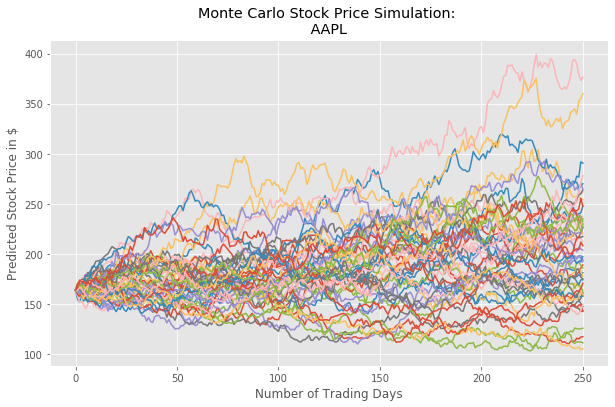

In [155]:
plt.figure(figsize=(10,6))
plt.xlabel('Number of Trading Days')
plt.ylabel('Predicted Stock Price in $')
plt.title('Monte Carlo Stock Price Simulation: \n {} '.format(ticker))
plt.style.use('ggplot')
plt.plot(projected_price);

We can notice that most of the simulations resulted in a final price between 150 and 300, exceprion made for a few outliers

## 3) Compare with real data

We ca now compare our simulations with the actual data for the projected period. In order to make it easier to users to visualise the results we coloured in gray all the simulated paths while we highlited in red the real data coming from Yahoo Finance.

Moreover, we can add the mean value of our simulations in blue.

In [171]:
T='2019-1-1'
realised_prices = pd.DataFrame()
realised_prices[ticker] = wb.DataReader(ticker, data_source='yahoo', start=t1, end=T,)['Adj Close']

In [172]:
average_projected_price = np.mean(price_list, axis=1)

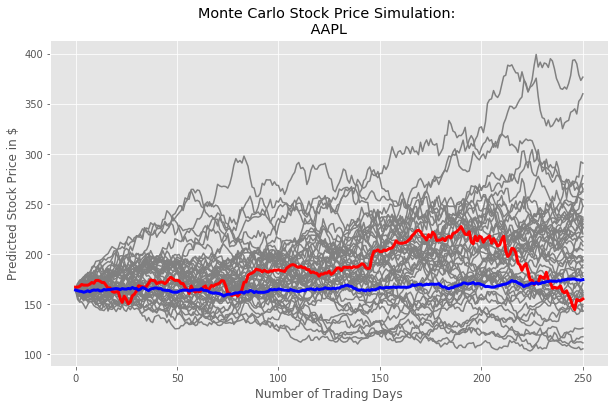

In [173]:
plt.figure(figsize=(10,6))
plt.xlabel('Number of Trading Days')
plt.ylabel('Predicted Stock Price in $')
plt.title('Monte Carlo Stock Price Simulation: \n {} '.format(ticker))
plt.style.use('ggplot')
plt.plot(projected_price, color='gray')
plt.plot(realised_prices.values, color = 'red',linestyle = '-',linewidth = 3)
plt.plot(average_projected_price, color = 'blue',linestyle = '-',linewidth = 3)

## 3) Compare with real data



We can observe that the real world data of AAPL's prices for the year 2019 fairly reflects our forecast.

The redline never exceeds the boundies set by our simulations and remains in the most densly populated area of our graph.
